In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()
import numpy as np
#import matplotlib
#import matplotlib.pyplot as plt

In [2]:
r,I,O,w,nu,mu,a,e = symbols("r,I,Omega,omega,nu,mu,a,e",real=True,positive=True)
r2,I2,O2,w2,nu2 = symbols("r_2,I_2,Omega_2,omega_2,nu_2",real=True)
r3,I3,O3,w3,nu3 = symbols("r_3,I_3,Omega_3,omega_3,nu_3",real=True)

Define required rotation matrices ($\Omega$ rotation about $\mathbf{\hat{e}}_3$, $I$ about $\mathbf{\hat{n}}$ and $\theta$ rotation about $\mathbf{\hat{h}}$)

In [3]:
rot1 = rotMat(3,O)
rot2 = rotMat(1,I)
rot3 = rotMat(3,w)

In [4]:
pCi = rot3*rot2*rot1
pCi

⎡-sin(Ω)⋅sin(ω)⋅cos(I) + cos(Ω)⋅cos(ω)  sin(Ω)⋅cos(ω) + sin(ω)⋅cos(I)⋅cos(Ω)  
⎢                                                                             
⎢-sin(Ω)⋅cos(I)⋅cos(ω) - sin(ω)⋅cos(Ω)  -sin(Ω)⋅sin(ω) + cos(I)⋅cos(Ω)⋅cos(ω) 
⎢                                                                             
⎣            sin(I)⋅sin(Ω)                         -sin(I)⋅cos(Ω)             

 sin(I)⋅sin(ω)⎤
              ⎥
 sin(I)⋅cos(ω)⎥
              ⎥
    cos(I)    ⎦

In [5]:
iCp = pCi.transpose(); iCp

⎡-sin(Ω)⋅sin(ω)⋅cos(I) + cos(Ω)⋅cos(ω)  -sin(Ω)⋅cos(I)⋅cos(ω) - sin(ω)⋅cos(Ω) 
⎢                                                                             
⎢sin(Ω)⋅cos(ω) + sin(ω)⋅cos(I)⋅cos(Ω)   -sin(Ω)⋅sin(ω) + cos(I)⋅cos(Ω)⋅cos(ω) 
⎢                                                                             
⎣            sin(I)⋅sin(ω)                          sin(I)⋅cos(ω)             

 sin(I)⋅sin(Ω) ⎤
               ⎥
 -sin(I)⋅cos(Ω)⎥
               ⎥
     cos(I)    ⎦

## Orbital Radius

In [6]:
r_p = Matrix([r*cos(nu),r*sin(nu),0])

In [7]:
r_i = pCi.transpose()*r_p

In [8]:
r_i = simplify(r_i);
r_i

⎡r⋅(-sin(Ω)⋅sin(ν + ω)⋅cos(I) + cos(Ω)⋅cos(ν + ω))⎤
⎢                                                 ⎥
⎢r⋅(sin(Ω)⋅cos(ν + ω) + sin(ν + ω)⋅cos(I)⋅cos(Ω)) ⎥
⎢                                                 ⎥
⎣               r⋅sin(I)⋅sin(ν + ω)               ⎦

In [9]:
r2 = (r_i/r).subs([(I,I2),(w,w2),(O,O2),(nu,nu2)])
r2

⎡-sin(Ω₂)⋅sin(ν₂ + ω₂)⋅cos(I₂) + cos(Ω₂)⋅cos(ν₂ + ω₂)⎤
⎢                                                    ⎥
⎢sin(Ω₂)⋅cos(ν₂ + ω₂) + sin(ν₂ + ω₂)⋅cos(I₂)⋅cos(Ω₂) ⎥
⎢                                                    ⎥
⎣                sin(I₂)⋅sin(ν₂ + ω₂)                ⎦

In [10]:
r3 = (r_i/r).subs([(I,I3),(w,w3),(O,O3),(nu,nu3)])
r3

⎡-sin(Ω₃)⋅sin(ν₃ + ω₃)⋅cos(I₃) + cos(Ω₃)⋅cos(ν₃ + ω₃)⎤
⎢                                                    ⎥
⎢sin(Ω₃)⋅cos(ν₃ + ω₃) + sin(ν₃ + ω₃)⋅cos(I₃)⋅cos(Ω₃) ⎥
⎢                                                    ⎥
⎣                sin(I₃)⋅sin(ν₃ + ω₃)                ⎦

In [11]:
simplify(r2.dot(r3))

In [12]:
simplify(r_i.norm()) #consistency check

In [13]:
(r_i/r).subs(nu+w,th)

⎡-sin(Ω)⋅sin(θ)⋅cos(I) + cos(Ω)⋅cos(θ)⎤
⎢                                     ⎥
⎢sin(Ω)⋅cos(θ) + sin(θ)⋅cos(I)⋅cos(Ω) ⎥
⎢                                     ⎥
⎣            sin(I)⋅sin(θ)            ⎦

## Projected Separation

In [14]:
svec = Matrix([r_i[0], r_i[1]])
svec

⎡r⋅(-sin(Ω)⋅sin(ν + ω)⋅cos(I) + cos(Ω)⋅cos(ν + ω))⎤
⎢                                                 ⎥
⎣r⋅(sin(Ω)⋅cos(ν + ω) + sin(ν + ω)⋅cos(I)⋅cos(Ω)) ⎦

In [15]:
s = simplify(sqrt(svec.transpose().dot(svec)))
s

In [16]:
s = simplify(svec.norm())
s

In [17]:
s.subs(2*nu+2*w,2*th)

## Phase Angle

In [18]:
beta = simplify(acos(r_i[2]/r)).subs(nu+w,th) #observer looking up along s_3 axis
beta

In [19]:
thval = np.linspace(0,2*np.pi, 1000)

In [20]:
betaf = lambdify((I,th),beta)
betaf

<function _lambdifygenerated(I, theta)>

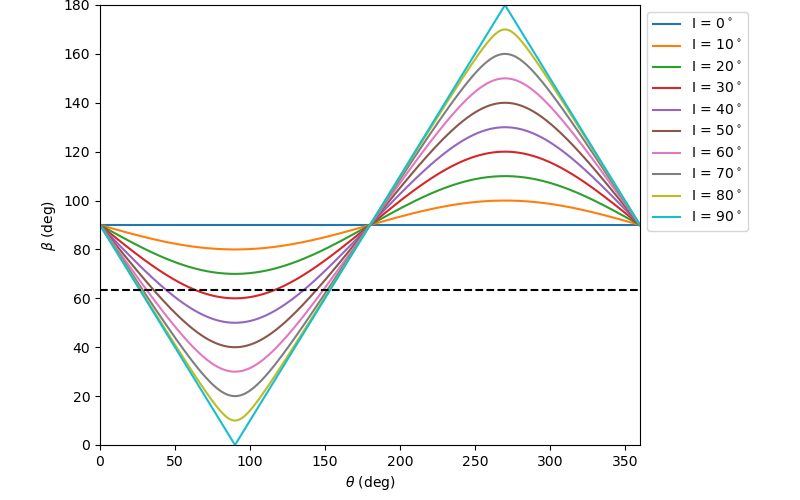

In [34]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.clf()
for j in range(0,100,10):
    plt.plot(thval*180/np.pi,betaf(j*np.pi/180.0,thval)*180/np.pi,label='I = %d$^\circ$'%j)
plt.plot([0,360],[63.3, 63.3],'k--')
plt.legend(bbox_to_anchor=[1,1])
plt.xlabel('$\\theta$ (deg)')
plt.ylabel('$\\beta$ (deg)')
plt.xlim([0,360])
plt.ylim([0,180])
plt.subplots_adjust(right=0.8, top=0.99)
#plt.savefig('beta_plot.png',dpi=300)

## Orbital Velocity

In [22]:
v_p = sqrt(mu/(a*(1 - e**2)))*Matrix([-sin(nu),(e+cos(nu)),0])
simplify(v_p)

⎡           ________          ⎤
⎢          ╱  -1              ⎥
⎢  -√μ⋅   ╱  ────── ⋅sin(ν)   ⎥
⎢        ╱    2               ⎥
⎢      ╲╱    e  - 1           ⎥
⎢  ─────────────────────────  ⎥
⎢              √a             ⎥
⎢                             ⎥
⎢        ________             ⎥
⎢       ╱  -1                 ⎥
⎢√μ⋅   ╱  ────── ⋅(e + cos(ν))⎥
⎢     ╱    2                  ⎥
⎢   ╲╱    e  - 1              ⎥
⎢─────────────────────────────⎥
⎢              √a             ⎥
⎢                             ⎥
⎣              0              ⎦

In [23]:
v_i = pCi.transpose()*v_p
v_i

⎡                                                             ________        
⎢                                                            ╱   1            
⎢√μ⋅(e + cos(ν))⋅(-sin(Ω)⋅cos(I)⋅cos(ω) - sin(ω)⋅cos(Ω))⋅   ╱  ──────    √μ⋅(-
⎢                                                          ╱        2         
⎢                                                        ╲╱    1 - e          
⎢───────────────────────────────────────────────────────────────────── - ─────
⎢                                  √a                                         
⎢                                                                             
⎢                                                             ________        
⎢                                                            ╱   1            
⎢√μ⋅(e + cos(ν))⋅(-sin(Ω)⋅sin(ω) + cos(I)⋅cos(Ω)⋅cos(ω))⋅   ╱  ──────    √μ⋅(s
⎢                                                          ╱        2         
⎢                                                   

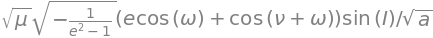

In [24]:
simplify(v_i[2]) #this is RV

In [25]:
simplify(v_i)

⎡         ________                                                            
⎢        ╱  -1                                                                
⎢-√μ⋅   ╱  ────── ⋅(e⋅sin(Ω)⋅cos(I)⋅cos(ω) + e⋅sin(ω)⋅cos(Ω) + sin(Ω)⋅cos(I)⋅c
⎢      ╱    2                                                                 
⎢    ╲╱    e  - 1                                                             
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                     √a                      
⎢                                                                             
⎢        ________                                                             
⎢       ╱  -1                                                                 
⎢√μ⋅   ╱  ────── ⋅(-e⋅sin(Ω)⋅sin(ω) + e⋅cos(I)⋅cos(Ω)⋅cos(ω) - sin(Ω)⋅sin(ν + 
⎢     ╱    2                                                                  
⎢   ╲╱    e  - 1                                    

In [26]:
simplify(pCi.transpose()*Matrix([-sin(nu),(e+cos(nu)),0])).subs(nu+w,th)

⎡-e⋅sin(Ω)⋅cos(I)⋅cos(ω) - e⋅sin(ω)⋅cos(Ω) - sin(Ω)⋅cos(I)⋅cos(θ) - sin(θ)⋅cos
⎢                                                                             
⎢-e⋅sin(Ω)⋅sin(ω) + e⋅cos(I)⋅cos(Ω)⋅cos(ω) - sin(Ω)⋅sin(θ) + cos(I)⋅cos(Ω)⋅cos
⎢                                                                             
⎣                           (e⋅cos(ω) + cos(θ))⋅sin(I)                        

(Ω)⎤
   ⎥
(θ)⎥
   ⎥
   ⎦

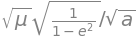

In [27]:
sqrt(mu/(a*(1 - e**2)))

## Phase Function Extrema

In [92]:
b,s = symbols('beta,s')
PhiL = (sin(b) + (pi-b)*cos(b))/pi
Phi = Function('Phi')(b)

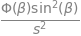

In [93]:
FpFs = Phi/(s/sin(b))**2
FpFs

In [107]:
fre = simplify(diff(FpFs,b)/sin(b)*s**2)
fre

In [117]:
meh = lambdify(b,simplify(diff(FpFs.subs(Phi,PhiL), b))*pi*s**2)

In [120]:
lambmin = simplify(2*PhiL*cos(b) + sin(b)*diff(PhiL,b))
lambmin

In [121]:
lambminf = lambdify(b,lambmin)

In [102]:
import scipy.optimize

In [134]:
scipy.optimize.fsolve(lambminf,1)[0]*180/np.pi

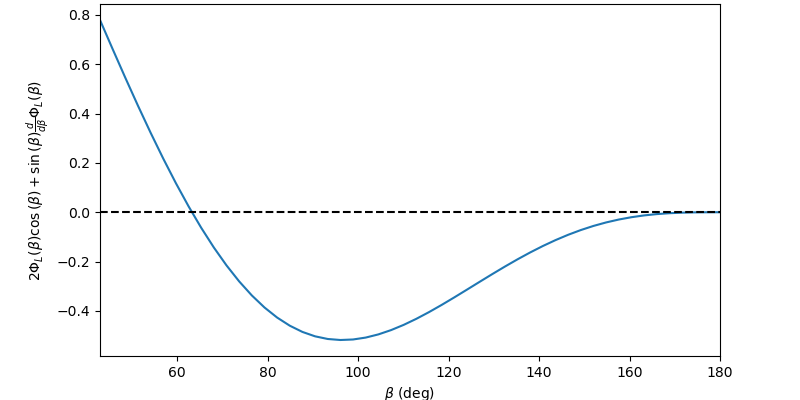

In [133]:
plt.figure(figsize=(8,4))
bval = np.linspace(0.75,np.pi)
plt.plot(bval*180/np.pi,lambminf(bval))
plt.plot(np.array([np.min(bval), np.max(bval)])*180/np.pi,[0,0],'k--')
plt.xlabel('$\\beta$ (deg)')
plt.ylabel('$2\\Phi_L{\\left(\\beta \\right)} \\cos{\\left(\\beta \\right)} + \\sin{\\left(\\beta \\right)} \\frac{d}{d \\beta} \\Phi_L{\\left(\\beta \\right)}$')
plt.xlim(np.array([np.min(bval), np.max(bval)])*180/np.pi)
plt.subplots_adjust(top=0.99)
#plt.savefig('lambert_extrema.png',dpi=300)